In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.offline as py 
color = sns.color_palette()
import plotly.graph_objs as go 
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('GrammarandProductReviews.csv')
df.head()

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,NaN,0.0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor. This review was collected as part...,Good,NaN,NaN,Dorothy W,73416000391
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor.,Good,NaN,NaN,Dorothy W,73416000391
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,113026909.0,NaN,1,https://www.walmart.com/reviews/product/43383370,I read through the reviews on here before look...,Disappointed,NaN,NaN,Rebecca,67981934427
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,171267657.0,NaN,1,https://www.walmart.com/reviews/product/43383370,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,Walker557,67981934427


In [3]:
from pivottablejs import pivot_ui

In [4]:
pivot_ui(df)

In [5]:
df.shape

(71044, 25)

In [6]:
df.dtypes

id                       object
brand                    object
categories               object
dateAdded                object
dateUpdated              object
ean                      object
keys                     object
manufacturer             object
manufacturerNumber       object
name                     object
reviews.date             object
reviews.dateAdded        object
reviews.dateSeen         object
reviews.didPurchase      object
reviews.doRecommend      object
reviews.id              float64
reviews.numHelpful      float64
reviews.rating            int64
reviews.sourceURLs       object
reviews.text             object
reviews.title            object
reviews.userCity         object
reviews.userProvince     object
reviews.username         object
upc                      object
dtype: object

In [7]:
df.isnull().sum()

id                          0
brand                       0
categories                  0
dateAdded                   0
dateUpdated                 0
ean                     31979
keys                        0
manufacturer              141
manufacturerNumber        203
name                        0
reviews.date               67
reviews.dateAdded           0
reviews.dateSeen            0
reviews.didPurchase     38886
reviews.doRecommend     10615
reviews.id              38886
reviews.numHelpful      38536
reviews.rating              0
reviews.sourceURLs          0
reviews.text               36
reviews.title             476
reviews.userCity        65634
reviews.userProvince    70595
reviews.username           96
upc                         2
dtype: int64

In [8]:
df = df.dropna(subset=['reviews.text'])
df.head()

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,NaN,0.0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor. This review was collected as part...,Good,NaN,NaN,Dorothy W,73416000391
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor.,Good,NaN,NaN,Dorothy W,73416000391
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,113026909.0,NaN,1,https://www.walmart.com/reviews/product/43383370,I read through the reviews on here before look...,Disappointed,NaN,NaN,Rebecca,67981934427
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,171267657.0,NaN,1,https://www.walmart.com/reviews/product/43383370,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,Walker557,67981934427


In [9]:
df = df.rename(columns={'reviews.text': 'reviews'})

In [10]:
df['reviews'].isnull().sum()

0

In [11]:
pip install --user fonttools

Note: you may need to restart the kernel to use updated packages.


In [12]:
"""#what are the words that people have used the most in their reviews
from wordcloud import WordCloud, STOPWORDS
from PIL import ImageFont
import matplotlib.pyplot as plt



stopwords = set(STOPWORDS)

def show_wordcloud(data, title=None):
    # Path to your TrueType font file (replace with the actual path to your TTF file)
    font_path = "C:/Windows/Fonts.ttf"
    
    # Create a custom font using PIL
    custom_font = ImageFont.truetype(font_path, size=28)
    
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40,
        scale=3,
        random_state=1  # chosen at random by flipping a coin; it was heads
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    
    # Use the custom font for text rendering
    plt.imshow(wordcloud.recolor(color_func=None, random_state=3), interpolation="bilinear")
    plt.axis("off")
    plt.show()

show_wordcloud(df['reviews'])"""

"""wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(df['reviews']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()"""
        
"""from PIL import Image, ImageDraw, ImageFont

unicode_text =str( df['reviews'])
font = ImageFont.truetype("arial.ttf", 28, encoding="unic")
text_width, text_height = font.getsize(unicode_text)
canvas = Image.new('RGB', (text_width + 10, text_height + 10), "orange")
draw = ImageDraw.Draw(canvas)
draw.text((5, 5), unicode_text, 'blue', font)
canvas.save("unicode-text.png", "PNG")
canvas.show()"""

'from PIL import Image, ImageDraw, ImageFont\n\nunicode_text =str( df[\'reviews\'])\nfont = ImageFont.truetype("arial.ttf", 28, encoding="unic")\ntext_width, text_height = font.getsize(unicode_text)\ncanvas = Image.new(\'RGB\', (text_width + 10, text_height + 10), "orange")\ndraw = ImageDraw.Draw(canvas)\ndraw.text((5, 5), unicode_text, \'blue\', font)\ncanvas.save("unicode-text.png", "PNG")\ncanvas.show()'

In [13]:
df.head()

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,NaN,0.0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor. This review was collected as part...,Good,NaN,NaN,Dorothy W,73416000391
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor.,Good,NaN,NaN,Dorothy W,73416000391
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,113026909.0,NaN,1,https://www.walmart.com/reviews/product/43383370,I read through the reviews on here before look...,Disappointed,NaN,NaN,Rebecca,67981934427
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,171267657.0,NaN,1,https://www.walmart.com/reviews/product/43383370,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,Walker557,67981934427


In [14]:
#So what is the maximum no of ratings that people gave
cnt_srs= df['reviews.rating'].value_counts()
trace=go.Bar(
    y=cnt_srs.index[::-1],
    x=cnt_srs.values[::-1],
    orientation = 'h',
    marker=dict(
        color=cnt_srs.values[::-1],
        colorscale = 'Blues',
        reversescale = True
    ),
    
    
    
)

layout=dict(title='Ratings distribution')
data=[trace]
fig=go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Ratings')

In [15]:
#Now lets have a look what do the length of the reviews tell about the ratings
df['reviews_length']=df['reviews'].apply(len)

In [16]:
df.head()

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc,reviews_length
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,0.0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11,201
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor. This review was collected as part...,Good,NaN,NaN,Dorothy W,73416000391,62
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor.,Good,NaN,NaN,Dorothy W,73416000391,12
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,NaN,1,https://www.walmart.com/reviews/product/43383370,I read through the reviews on here before look...,Disappointed,NaN,NaN,Rebecca,67981934427,696
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,NaN,1,https://www.walmart.com/reviews/product/43383370,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,Walker557,67981934427,132


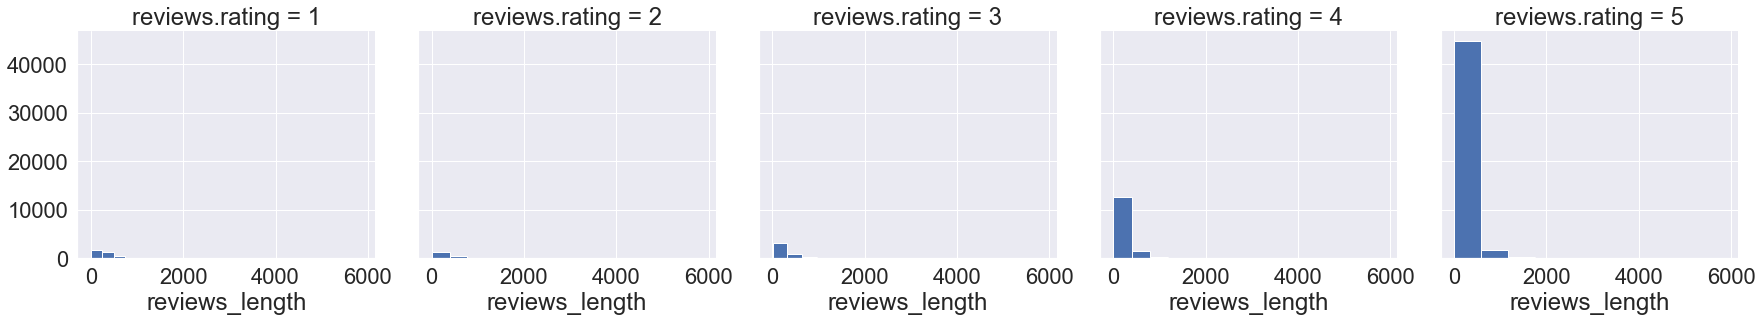

In [17]:
sns.set(font_scale=2.0)
g=sns.FacetGrid(df,col='reviews.rating',size=5)
g.map(plt.hist, 'reviews_length')

#who all are giving fake reviews?

In [18]:
df['reviews.didPurchase'].fillna('Review N/A',inplace=True)

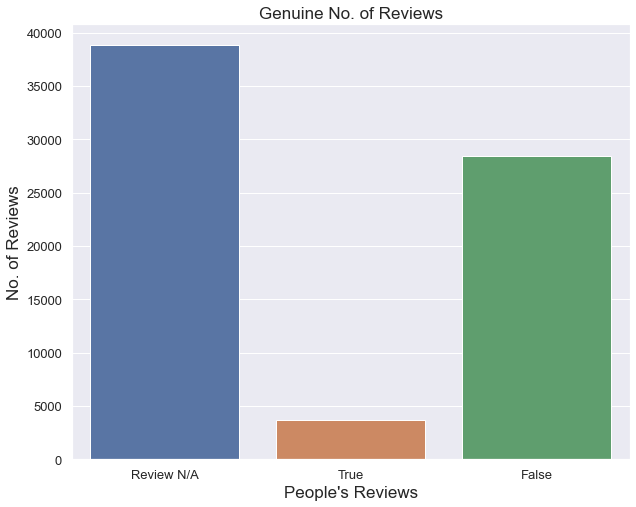

In [19]:
plt.figure(figsize=(10,8))
ax=sns.countplot(df['reviews.didPurchase'])
ax.set_xlabel(xlabel="People's Reviews",fontsize=17)
ax.set_ylabel(ylabel='No. of Reviews',fontsize=17)
ax.axes.set_title('Genuine No. of Reviews',fontsize=17)
ax.tick_params(labelsize=13)

<AxesSubplot:>

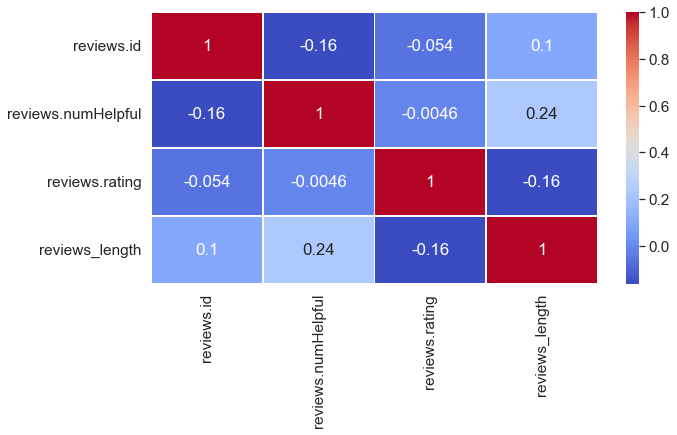

In [20]:
# Now lets plot the correlation map 
sns.set(font_scale=1.4)
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True,linewidths=.5)

In [21]:
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer

all_text=df['reviews']
train_text=df['reviews']
y=df['reviews.rating']

# Using Tfidf vesctor 

In [22]:
word_vectorizer=TfidfVectorizer(sublinear_tf=True,
                                strip_accents='unicode',
                                analyzer='word',
                                token_pattern= r'\w{1,}',
                                stop_words='english',
                                ngram_range=(1,1),
                                max_features=10000)
word_vectorizer.fit(all_text)
train_word_features=word_vectorizer.transform(train_text)


In [23]:
char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    stop_words='english',
    ngram_range=(2, 6),
    max_features=50000)
char_vectorizer.fit(all_text)
train_char_features = char_vectorizer.transform(train_text)

train_features = hstack([train_char_features, train_word_features])

# Random Forest Classifier 

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(train_features,y,test_size=0.3,random_state=101)


In [32]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)
preds=classifier.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score

# XGBoost

In [26]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [27]:
import xgboost as xgb
xgb=xgb.XGBClassifier()

In [28]:
xgb.fit(X_train,y_train)

[23:21:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [30]:
preds2=xgb.predict(X_test)

In [31]:
xgb_accuracy=accuracy_score(preds2,y_test)

In [34]:
rf_accuracy=accuracy_score(preds,y_test)

In [35]:
print("Random Forest MOdel accuracy",rf_accuracy)

Random Forest MOdel accuracy 0.7196638971036943


In [36]:
print("XGBoost Model accuracy",xgb_accuracy)

XGBoost Model accuracy 0.7242172463972211


# Deep Learning

In [37]:
df['sentiment']=df['reviews.rating']<4

In [38]:
from sklearn.model_selection import train_test_split
train_text, test_text,train_y,test_y=train_test_split(df['reviews'],df['sentiment'],test_size=0.2)

In [43]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.optimizers import adam_v2

In [44]:
MAX_NB_WORDS=20000

#get the raw text data 
texts_train=train_text.astype(str)
texts_test=test_text.astype(str)

#finally, vectorize the text samples into a 2D integer tensor 
tokenizer=Tokenizer(nb_words=MAX_NB_WORDS,char_level=False)
tokenizer.fit_on_texts(texts_train)
sequences=tokenizer.texts_to_sequences(texts_train)
sequences_test=tokenizer.texts_to_sequences(texts_test)

word_index=tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 26048 unique tokens.


In [45]:
MAX_SEQUENCE_LENGTH= 200

X_train=pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
X_test=pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)
print ('Shape of Data tensor:', X_train.shape)
print ('Shape of data test tensor:', X_test.shape)


Shape of Data tensor: (56806, 200)
Shape of data test tensor: (14202, 200)


In [46]:
model= Sequential()
model.add(Embedding(MAX_NB_WORDS,128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, input_shape=(1,)))
model.add(Dense(1,activation='sigmoid'))

In [47]:
model.compile(loss="binary_crossentropy",
              optimizer='adam',
              metrics=['accuracy'])

In [49]:
model.fit(X_train, train_y,
          batch_size=128,
          epochs=10,
          validation_data=(X_test, test_y))

Epoch 1/10
444/444 [==============================] - 964s 2s/step - loss: 0.2612 - accuracy: 0.8999 - val_loss: 0.2204 - val_accuracy: 0.9148
Epoch 2/10
444/444 [==============================] - 937s 2s/step - loss: 0.1857 - accuracy: 0.9314 - val_loss: 0.2337 - val_accuracy: 0.9159
Epoch 3/10
 40/444 [=>............................] - ETA: 16:25:31 - loss: 0.1419 - accuracy: 0.9490

KeyboardInterrupt: 